# Cleaning candidatos

<a id = 'table'> </a>
## Table of contents

- Part I - Gathering the data
    - [Key Points](#key)
    - [Converting DTA to CSV file](#dta)
    - [Reading the CSV file](#read)    

- Part II - Assessing and cleaning
    - [Exploring the table](#explore)
    - [Making copies](#copies)
    - [Assesment and cleaning](#clean)
    - [Storing Data](#store)
    
- Part III - Analysis and visualization
    - [¿Cuál es el porcentaje de colocación?](#estados)
    - [¿En cuáles programas se originan las postulaciones?](#programa)
    - [Estatus final de vínculo](#vinculo)

In [3]:
import pandas as pd
import numpy as np
import os
import time
import sys
import re

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# for visualizing NAN
import missingno as msno

# for visualizing all columns
pd.options.display.max_columns = None


<a id='key'></a>
[Return to Table of Contents](#table)

## Key Points for assessing and cleaning

- The BID2.CANDIDATO.dta file contains almost 2,350,000 records and 159 fields (columns).
- The analysis will focus on the next federal entities of the SNE ofices: Chiapas, Nuevo León, Jalisco, Veracruz, Ciudad de México, and Estado de México.
- Also, the analysis will be delimited to the next fields: 
    - 0   id
    - 1   id_solicitante
    - 2   entidadfed_sne
    - 4   sexo
    - 6   edad
    - 8   edocivil 
    - 9   cedo_domicilio
    - 11  nomb_localidad_domicilio
    - 14  escolaridad
    - 15  carrera
    - 16  sit_academica
    - 19  idioma
    - 54  qempleobusca
    - 55  salariopretente
    - 60  tipoexperiencia
    - 61  disp_viajar
    - 62  disp_vivir
    - 70  funciones    
    - 71  trabajaactualmente
    - 72  motivo
    - 73  fchcomienzo_busqueda
    - 119 clen_idcvelengua
    - 120 tipodiscapacidad
    - 143 id_ocupacion
    - 144 ocupacion
    - 145 id_area
    - 146 area
    - 147 id_subarea
    - 148 subarea
    - 157 colocados
    - 158 estatus_candidato_colocados

<a id='dta'></a>
[Return to Table of Contents](#table)
## Converting DTA to CSV file

In [ ]:
#  First we create a reader with a small chunk in order to know the column names
my_stata_reader = pd.read_stata('data/BID2.CANDIDATO.dta', chunksize=2)
my_stata_reader._encoding = 'utf-8'
my_stata_reader.variable_labels()

In [ ]:
# The my_stata_reader object allows us reading the big dta file by chunks
# filtering by the columns that we need 
my_stata_reader = pd.read_stata('BID2.CANDIDATO.dta', chunksize=10000, 
                                columns=['id','id_solicitante', 'entidadfed_sne', 'sexo', 'edad', 'edocivil', 
                                         'cedo_domicilio', 'nomb_localidad_domicilio','escolaridad', 'carrera', 
                                         'sit_academica', 'idioma', 'qempleobusca', 'salariopretente',
                                         'tipoexperiencia', 'disp_viajar', 'disp_vivir', 'funciones', 
                                         'trabajaactualmente', 'motivo', 'fchcomienzo_busqueda', 'clen_idcvelengua',
                                         'tipodiscapacidad', 'id_ocupacion', 'ocupacion', 'id_area', 'area',
                                         'id_subarea', 'subarea', 'colocados', 'estatus_candidato_colocados'])
my_stata_reader._encoding = 'utf-8'

In [ ]:
# start y end will measure time
start = time.time()
first = True

# for each chunk it will do the next:
for chunk in my_stata_reader:
    if first:        # only append the header if it is the first chunk:
        # filtering the rows by the given values for entidadfed_sne
        filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
        z = chunk[filter_rows]
        z.to_csv('candidatos.csv', mode='a', index=False, header=True)  #‘a’ append
        print('.', end = '')
        first = False
        
    # Omit the header for the next chunks
    # filtering the rows by the given values for entidadfed_sne
    # filter_rows es una lista de bools
    filter_rows = chunk['entidadfed_sne'].isin(['CHIAPAS','NUEVO LEON','JALISCO','VERACRUZ','CIUDAD DE MEXICO','MEXICO, ESTADO DE'])
    z = chunk[filter_rows]    
    z.to_csv('candidatos.csv', mode='a', index=False, header=False) #‘a’ append.
    # Print a dot each time a chunk is appended
    print('.', end = '')
end = time.time()
print (('Total time: ') + str(end - start))

In [ ]:
# Verifiquemos el tamanio del CSV
filesize= os.stat('candidatos.csv').st_size
print(filesize)

<a id='read'></a>
[Return to Table of Contents](#table)
## Reading the CSV

The successful use of pd.read_csv may vary because of the <b>file size, type of processor, memory, code,</b> or some other variables.

If the code runs out of memory, you can try reading in chunks.

In [4]:
candidatos = pd.read_csv('candidatos.csv')
candidatos.head(1)

/home/liliana/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
0,2347459,501,NUEVO LEON,MASCULINO,31,SOLTERO (A),HIDALGO,HUEJUTLA DE REYES,SIN INSTRUCCIÓN,Ninguna,ESTUDIANTE,NINGUNO,"Auxiliar, ayudante o aprendiz de rotulista",3000.0,NaN,NO,NO,NaN,NO,Ajuste de personal,1999-01-01,No,Ninguna,214301,Trabajadora social,17,SECTOR SALUD / MEDICINA,101,ASESORAMIENTO PSICOLÓGICO Y TRABAJO SOCIAL,1,SI


<a id='explore'></a>
[Return to Table of Contents](#table)
## Exploring the table


In [ ]:
candidatos.sample(5)

In [ ]:
candidatos.info()

In [ ]:
candidatos[candidatos.duplicated()].sort_values(by='nomb_localidad_domicilio')

In [ ]:
candidatos.entidadfed_sne.unique()

In [ ]:
candidatos.sexo.unique()

In [ ]:
candidatos.groupby('edad')['id'].nunique()


In [ ]:
candidatos.edocivil.unique()

In [ ]:
a = candidatos.cedo_domicilio.unique()
print(sorted(a))

In [ ]:
candidatos.nomb_localidad_domicilio.unique().tolist()

In [ ]:
candidatos.escolaridad.unique()

In [ ]:
candidatos.carrera.unique().tolist()

In [ ]:
candidatos.sit_academica.unique()

In [ ]:
candidatos.idioma.unique()

In [ ]:
candidatos.tipoexperiencia.unique().tolist()

In [ ]:
candidatos.disp_viajar.unique()

In [ ]:
candidatos.disp_vivir.unique()

In [ ]:
candidatos.funciones.unique().tolist()

In [ ]:
candidatos.trabajaactualmente.unique()

In [ ]:
candidatos.motivo.unique()

In [ ]:
candidatos.fchcomienzo_busqueda.unique()

In [ ]:
candidatos.clen_idcvelengua.unique()

In [ ]:
candidatos.tipodiscapacidad.unique()

In [ ]:
candidatos.ocupacion.unique()

In [ ]:
unique, counts = np.unique(candidatos.area, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [ ]:
np.sort(candidatos.subarea.unique())

In [ ]:
candidatos.colocados.unique()

In [ ]:
candidatos.estatus_candidato_colocados.unique()

In [ ]:
#NaN in candidatos
candidatos = candidatos.replace("nan",np.nan)
msno.matrix(candidatos.sample(250));

<a id='copies'></a>
[Return to Table of Contents](#table)
## Making copies

The first step before any cleaning is **always make copies**

In [5]:
candidatos_clean = candidatos.copy()

<a id='assess1'></a>[Return to Table of Contents](#table)
## Assesment and cleaning
#### Quality changes
1. [Wrong Datatypes](#datatypes)
2. [Remove the ending spaces in `cedo_domicilio`](#spaces)
3. [The value 'MEXICO, ESTADO DE' must be changed ](#edomex)
4. [Some candidates have unexpected values for `edad`.](#edad)
5. [Values in `tipoexperiencia` have mixed upper-lowercase and spaces](#trimAndUpp)
6. [Values for no experience in `tipoexperiencia` can be unified](#unify)
7. [Values in `clen_idcvelengua` must be completed](#lengua_indigena)
8. [`area` and `subarea` have mixed upper and lowercase values](#uplowcase)  
9. [Column names](#col_names)
10. [Define categorical columns](#categorical)

#### Tidiness changes
Not a single so far.

<a id='datatypes'></a>
### 1. Wrong datatypes 

`tipoexperiencia` has mixed string and float datatypes

In [6]:
candidatos_clean['tipoexperiencia'] = candidatos_clean['tipoexperiencia'].astype(str)

In [7]:
type(candidatos_clean['tipoexperiencia'][0])

str

<a id='spaces'></a>
[Return to Assesment](#assess1)
### 2. Remove the ending spaces in `cedo_domicilio` 
Using str.strip() function

In [8]:
candidatos_clean.cedo_domicilio = candidatos_clean.cedo_domicilio.str.strip()

In [9]:
candidatos_clean.cedo_domicilio.unique()

array(['HIDALGO', 'CHIAPAS', 'VERACRUZ', 'TABASCO', 'JALISCO',
       'CIUDAD DE MÉXICO', 'DURANGO', 'MEXICO, ESTADO DE', 'SINALOA',
       'NUEVO LEON', 'COLIMA', 'GUANAJUATO', 'MICHOACAN', 'QUINTANA ROO',
       'GUERRERO', 'OAXACA', 'PUEBLA', 'ZACATECAS', 'MORELOS',
       'BAJA CALIFORNIA', 'SAN LUIS POTOSI', 'YUCATAN', 'TAMAULIPAS',
       'AGUASCALIENTES', 'NAYARIT', 'QUERETARO', 'COAHUILA',
       'BAJA CALIFORNIA SUR', 'SONORA', 'CAMPECHE', 'TLAXCALA',
       'CHIHUAHUA'], dtype=object)

<a id='edomex'></a>
[Return to Assesment](#assess1)
### 3. The value 'MEXICO, ESTADO DE'  must be changed 
'ESTADO DE MEXICO' must be used instead of 'MEXICO, ESTADO DE', which is a better reading of the value.
Use replace function

In [10]:
candidatos_clean = candidatos_clean.replace({'entidadfed_sne': r'^[MEXICO, ESTADO DE].+'}, 
                                            {'entidadfed_sne': 'ESTADO DE MEXICO'}, regex = True )

In [11]:
candidatos_clean = candidatos_clean.replace({'cedo_domicilio': r'^[MEXICO, ESTADO DE].+'}, 
                                            {'cedo_domicilio': 'ESTADO DE MEXICO'}, regex = True )

In [12]:
# Verify change
candidatos_clean.entidadfed_sne.unique()

array(['NUEVO LEON', 'ESTADO DE MEXICO', 'VERACRUZ', 'JALISCO'],
      dtype=object)

In [13]:
candidatos_clean.cedo_domicilio.unique()

array(['HIDALGO', 'ESTADO DE MEXICO', 'VERACRUZ', 'JALISCO', 'NUEVO LEON',
       'GUANAJUATO', 'QUINTANA ROO', 'GUERRERO', 'PUEBLA', 'ZACATECAS',
       'BAJA CALIFORNIA', 'YUCATAN', 'NAYARIT', 'QUERETARO',
       'BAJA CALIFORNIA SUR'], dtype=object)

<a id='edad'></a>
[Return to Assesment](#assess1)
### 4. Some candidates have unexpected values for `edad`.
Values from 3 to 15 years will be changed for the average age.

In [14]:
# The average age
candidatos_clean.edad.mean()

32.75689553700858

A numpy array will be created and then replaced where edad < 16

In [15]:
a = np.array(candidatos_clean.edad.values.tolist())

In [17]:
candidatos_clean.edad = np.where(a < 16, candidatos_clean.edad.mean(), a)

In [18]:
# Verify the change
candidatos_clean.query('edad < 16')

,id,id_solicitante,entidadfed_sne,sexo,edad,edocivil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,qempleobusca,salariopretente,tipoexperiencia,disp_viajar,disp_vivir,funciones,trabajaactualmente,motivo,fchcomienzo_busqueda,clen_idcvelengua,tipodiscapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados


<a id='trimAndUpp'></a>
[Return to Assesment](#assess1)
### 5. Values in `tipoexperiencia` have mixed upper-lowercase and spaces

Use the functions `strip` and `upper`

In [19]:
candidatos_clean.tipoexperiencia = candidatos_clean.tipoexperiencia.str.strip()

In [20]:
candidatos_clean.tipoexperiencia = candidatos_clean.tipoexperiencia.str.upper()

In [21]:
# Verify the changes
candidatos_clean.tipoexperiencia.value_counts()

NAN                                                                      729995
NINGUNA                                                                   23894
NINGUNO                                                                   15187
VENTAS                                                                    11475
AYUDANTE GENERAL                                                           9272
[INDICA EL CONOCIMIENTO]                                                   6238
AUXILIAR ADMINISTRATIVO                                                    5362
ADMINISTRATIVO                                                             5349
COMPUTACION                                                                4791
CHOFER                                                                     4237
ATENCION A CLIENTES                                                        3351
ADMINISTRACION                                                             3112
ALMACENISTA                             

<a id='unify'></a>
[Return to Assesment](#assess1)
### 6. Values for no experience in `tipoexperiencia` can be unified

Use the match function and regular expressions (regex)

In [22]:
# match all NING
a = candidatos_clean[candidatos_clean['tipoexperiencia'].str.match(pat = r'.*NING.*', case=False)].tipoexperiencia

In [23]:
# show all and count values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(a.value_counts())

NINGUNA                                                                                                 23894
NINGUNO                                                                                                 15187
NINGUN                                                                                                     37
NINGUNIO                                                                                                   21
NINGUINO                                                                                                   20
NINGIUNA                                                                                                   15
NINGUNA.                                                                                                   12
NINGNA                                                                                                     11
NINGUA                                                                                                     10
NINGINO   

In [24]:
# a serie with all values of tipoexperiencia
experiencias = candidatos_clean.tipoexperiencia
type(experiencias)

pandas.core.series.Series

In [25]:
# r is a regex NING|ning
r = re.compile('NING|ning|Ning')
# vectorized function which takes a nested sequence of objects or numpy arrays as inputs 
# and returns a single numpy array
# Using re.search instead of re.match which matches the pattern from beginning of the string
ning_match = np.vectorize(lambda x:bool(r.search(x)))
# call function for the series experiencias. Returns a bool array
exp_bool_array = ning_match(experiencias)

In [26]:
exp_bool_array

array([False, False,  True, ..., False, False, False])

In [27]:
# Setting values with df.loc
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
# convert the bool array to list. Change all True in tipoexperiencia with 'NINGUNA'
candidatos_clean.loc[exp_bool_array.tolist(),['tipoexperiencia']] = 'NINGUNA'

Also we'll add up 'NAN' and '\[INDICA EL CONOCIMIENTO\]' to 'NO ESPECIFICADO'

In [28]:
candidatos_clean = candidatos_clean.replace({'tipoexperiencia':{'NAN':'NO ESPECIFICADO', 
                                                                '[INDICA EL CONOCIMIENTO]':'NO ESPECIFICADO'}});

Verifying changes

In [29]:
# match all
b = candidatos_clean[candidatos_clean['tipoexperiencia'].str.match(pat = r'.*NING.*', case=False)].tipoexperiencia

In [30]:
# show all and count values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(b.value_counts())

NINGUNA    39451
Name: tipoexperiencia, dtype: int64


In [31]:
candidatos_clean.tipoexperiencia.value_counts()

NO ESPECIFICADO                                                          736531
NINGUNA                                                                   39451
VENTAS                                                                    11475
AYUDANTE GENERAL                                                           9272
AUXILIAR ADMINISTRATIVO                                                    5362
ADMINISTRATIVO                                                             5349
COMPUTACION                                                                4791
CHOFER                                                                     4237
ATENCION A CLIENTES                                                        3351
ADMINISTRACION                                                             3112
ALMACENISTA                                                                3065
COMPUTADORA                                                                3011
LIMPIEZA                                

<a id='lengua_indigena'></a>
[Return to Assesment](#assess1)
### 7. Values in `clen_idcvelengua` must be completed

In [32]:
candidatos_clean.clen_idcvelengua.unique()

array(['No', 'NO', 'Si, NAHUAT', '0', 'Si, TZELTZ', 'Si, TOTONA',
       'Si, TZOTZI', 'Si, POPOLU', 'Si, TOJOLA', 'Si, PUREPE',
       'Si, POPOLO', 'Si, CHOL', 'Si, HUASTE', 'Si, OTRAS ', 'Si, NO ESP',
       'Si, MIXTEC', 'Si, ZAPOTE', 'Si, MAZATE', 'Si, AGUACA',
       'Si, OTOMI', 'Si, MAZAHU', 'Si, DE LAL', 'Si, PAPAGO', 'Si, SERI',
       'Si, HUICHO', 'Si, CHINAN', 'Si, TRIQUI', 'Si, AMUZGO',
       'Si, MOTOCI', 'Si, ZOQUE', 'Si, MAYA', 'Si, MIXE', 'Si, CHATIN',
       'Si, TLAPAN', 'Si, CUCAPA', 'Si, MATLAT', 'Si, LACAND', 'Si, MAYO'],
      dtype=object)

In [33]:
candidatos_clean = candidatos_clean.replace({'clen_idcvelengua':{'Si, NAHUAT':'Nahuatl','Si, TZELTZ':'Tzeltal',
                                        'Si, TOTONA':'Totonaca', 'Si, TZOTZI':'Tzotzil','Si, POPOLU':'Popoluca',
                                        'Si, TOJOLA':'Tojolabal', 'Si, PUREPE':'Purepecha', 'Si, POPOLO':'Popoloca',
                                        'Si, CHOL':'Chol', 'Si, HUASTE':'Huasteco', 'Si, OTRAS ':'Otras', 
                                        'Si, NO ESP':'No Español', 'Si, MIXTEC':'Mixteco', 'Si, ZAPOTE':'Zapoteco',
                                        'Si, MAZATE':'Mazateco', 'Si, AGUACA':'Aguacateco','Si, OTOMI':'Otomí',
                                        'Si, MAZAHU':'Mazahua', 'Si, DE LAL':'De Lal', 'Si, PAPAGO':'Pápago', 
                                        'Si, SERI':'Seri', 'Si, HUICHO':'Huichol', 'Si, CHINAN':'Chinanteco', 
                                        'Si, TRIQUI':'Triqui', 'Si, AMUZGO':'Amuzgo','Si, MOTOCI':'Motozintleco',
                                        'Si, ZOQUE':'Zoque', 'Si, MAYA':'Maya', 'Si, MIXE':'Mixe', 
                                        'Si, CHATIN':'Chatino', 'Si, TLAPAN':'Tlapaneco', 'Si, CUCAPA':'Cucapa', 
                                        'Si, MATLAT':'Matlatzinca', 'Si, LACAND':'Lacandón', 'Si, MAYO':'Mayo' }})

In [34]:
candidatos_clean = candidatos_clean.replace({'clen_idcvelengua':{'NO':'No', '0':'No'}})

In [35]:
candidatos_clean.clen_idcvelengua.unique()

array(['No', 'Nahuatl', 'Tzeltal', 'Totonaca', 'Tzotzil', 'Popoluca',
       'Tojolabal', 'Purepecha', 'Popoloca', 'Chol', 'Huasteco', 'Otras',
       'No Español', 'Mixteco', 'Zapoteco', 'Mazateco', 'Aguacateco',
       'Otomí', 'Mazahua', 'De Lal', 'Pápago', 'Seri', 'Huichol',
       'Chinanteco', 'Triqui', 'Amuzgo', 'Motozintleco', 'Zoque', 'Maya',
       'Mixe', 'Chatino', 'Tlapaneco', 'Cucapa', 'Matlatzinca',
       'Lacandón', 'Mayo'], dtype=object)

<a id='uplowcase'></a>
[Return to Assesment](#assess1)
### 8. `area` and `subarea` have mixed upper and lowercase values


In [36]:
candidatos_clean.area = candidatos_clean.area.str.upper()
candidatos_clean.subarea = candidatos_clean.subarea.str.upper()

In [37]:
# Verify there are no lowercase values in area
unique2, counts2 = np.unique(candidatos_clean.area, return_counts=True)
dict(zip(unique2, counts2))

{'ADMINISTRACIÓN': 112359,
 'APOYO DE OFICINA': 88571,
 'CALL CENTER Y SERVICIO AL CLIENTE': 14772,
 'CEO Y DIRECCIÓN GENERAL': 28027,
 'CIENCIAS Y TECNOLOGÍA': 12328,
 'CONSERVACIÓN AGRÍCOLA Y ANIMALES': 25904,
 'CONSTRUCCIÓN': 21047,
 'CONSULTORÍA Y ESTRATEGIA': 3899,
 'CONTABILIDAD': 47572,
 'DEPORTES Y RECREACIÓN': 3240,
 'DISEÑO': 16296,
 'EDUCACIÓN Y CAPACITACIÓN': 34786,
 'GOBIERNO Y DEFENSA': 28221,
 'INDUSTRIAS Y ACTIVIDADES CREATIVAS': 4229,
 'INGENIERÍA': 46837,
 'INSTALACIÓN, MANTENIMIENTO, Y REPARACIÓN': 44359,
 'LEGAL': 27383,
 'MANUFACTURA Y PRODUCCIÓN': 39516,
 'MEDIOS DE COMUNICACIÓN Y PUBLICIDAD': 3932,
 'MERCADOTECNIA Y COMERCIALIZACIÓN': 13595,
 'MINERÍA Y ENERGÍA': 2182,
 'OFICIOS Y SERVICIOS': 156904,
 'PROPIEDADES Y BIENES RAÍCES': 682,
 'RECURSOS HUMANOS Y RECLUTAMIENTO': 60715,
 'SECTOR SALUD / MEDICINA': 84690,
 'SEGUROS, FIANZAS Y PENSIONES': 983,
 'SERVICIOS A LA COMUNIDAD': 19475,
 'SERVICIOS BANCARIOS Y FINANCIEROS': 36987,
 'TECNOLOGÍAS DE LA INFORMACIÓN 

In [38]:
# Verify there are no lowercase values in subarea
unique3, counts3 = np.unique(candidatos_clean.subarea, return_counts=True)
dict(zip(unique3, counts3))

{'ACABADOS (YESERO, AZULEJERO, PASTERO, ETC)': 70,
 'ACTUARÍA': 131,
 'ADMINISTRACIÓN': 398,
 'ADMINISTRACIÓN / GESTIÓN / DIRECCIÓN': 4366,
 'ADMINISTRACIÓN BANCARIA': 1852,
 'ADMINISTRACIÓN COMERCIAL Y VENTAS': 8828,
 'ADMINISTRACIÓN DE ESPACIOS': 533,
 'ADMINISTRACIÓN DE LA PLANTA PRODUCTIVA': 1889,
 'ADMINISTRACIÓN DEL PERSONAL': 725,
 'ADMINISTRACIÓN GENERAL': 111824,
 'ADMINISTRACIÓN PÚBLICA': 363,
 'ADQUISICIONES E INVENTARIO': 38283,
 'AGENCIAS DE VIAJES / CONSULTORES': 522,
 'AGENTES DE RECAUDACIÓN TRIBUTARIA': 363,
 'AGRONOMÍA Y SERVICIOS AGRÍCOLAS': 9951,
 'AGROPECUARÍA Y SERVICIOS AVÍCOLAS,  GANADEROS , PECUARIOS Y APÍCOLAS': 515,
 'ALIMENTARIA': 152,
 'ANÁLISIS ECONÓMICO': 1646,
 'ANÁLISIS SOCIAL Y ANTROPOLÓGICO': 1423,
 'APOYO A TERCERA EDAD Y DISCAPACIDAD': 2464,
 'APOYO ESCOLAR': 297,
 'APOYO Y COORDINACIÓN DE VOLUNTARIADO/PROMOTOR COMUNITARIO': 11248,
 'APOYO Y GESTIÓN EN OFICINAS LEGALES': 10450,
 'APUESTAS Y JUEGOS DE AZAR': 23,
 'ARQUITECTOS TECNOLÓGICOS': 267,
 'ART

<a id='col_names'></a>
[Return to Assesment](#assess1)
### 9. Column names  


It is suggested to use the rename function to change names to the following:

- edocivil -> edo_civil
- qempleobusca -> empleo_buscado
- salariopretente -> salario_pretendido
- tipoexperiencia -> tipo_experiencia
- trabajaactualmente ->trabaja_actualmente
- motivo  -> motivo_no_trabaja 
- fchcomienzo_busqueda -> fecha_inicio_busqueda
- clen_idcvelengua -> lengua_indigena
- tipodiscapacidad -> tipo_discapacidad 

In [39]:
candidatos_clean.rename(columns={'edocivil':'edo_civil',
                                  'qempleobusca':'empleo_buscado',
                                  'salariopretente':'salario_pretendido',
                                  'tipoexperiencia':'tipo_experiencia',
                                  'trabajaactualmente':'trabaja_actualmente',
                                  'motivo':'motivo_no_trabaja',
                                  'fchcomienzo_busqueda':'fecha_inicio_busqueda',
                                  'clen_idcvelengua':'lengua_indigena',
                                  'tipodiscapacidad':'tipo_discapacidad'}, inplace=True)

In [40]:
# Verify new column names
candidatos_clean.columns.tolist()

['id',
 'id_solicitante',
 'entidadfed_sne',
 'sexo',
 'edad',
 'edo_civil',
 'cedo_domicilio',
 'nomb_localidad_domicilio',
 'escolaridad',
 'carrera',
 'sit_academica',
 'idioma',
 'empleo_buscado',
 'salario_pretendido',
 'tipo_experiencia',
 'disp_viajar',
 'disp_vivir',
 'funciones',
 'trabaja_actualmente',
 'motivo_no_trabaja',
 'fecha_inicio_busqueda',
 'lengua_indigena',
 'tipo_discapacidad',
 'id_ocupacion',
 'ocupacion',
 'id_area',
 'area',
 'id_subarea',
 'subarea',
 'colocados',
 'estatus_candidato_colocados']

<a id='categorical'></a>
### 10. Define categorical columns 

Convert to categorical the `escolaridad, sit_academica` columns

In [41]:
#Convert to ordered categorical type with custom ordering:
cat_escolaridad = pd.api.types.CategoricalDtype(categories=
                                              ['SIN INSTRUCCIÓN','SABER LEER Y ESCRIBIR','PRIMARIA'
                                              'SECUNDARIA/SEC. TÉCNICA', 'CARRERA COMERCIAL','CARRERA TÉCNICA',
                                               'PROFESIONAL TÉCNICO (CONALEP)', 'PREPA O VOCACIONAL',
                                              'T. SUPERIOR UNIVERSITARIO','LICENCIATURA', 'MAESTRÍA', 'DOCTORADO'],
                                              ordered=True)
candidatos_clean.escolaridad = candidatos_clean.escolaridad.astype(cat_escolaridad);

In [42]:
candidatos_clean.escolaridad.dtype

CategoricalDtype(categories=['SIN INSTRUCCIÓN', 'SABER LEER Y ESCRIBIR',
                  'PRIMARIASECUNDARIA/SEC. TÉCNICA', 'CARRERA COMERCIAL',
                  'CARRERA TÉCNICA', 'PROFESIONAL TÉCNICO (CONALEP)',
                  'PREPA O VOCACIONAL', 'T. SUPERIOR UNIVERSITARIO',
                  'LICENCIATURA', 'MAESTRÍA', 'DOCTORADO'],
                 ordered=True)

For `sit_academica` we'll unify 'NINGUNO' and 'NO ESPECIFICADO'

In [43]:
candidatos_clean.sit_academica.unique()

array(['ESTUDIANTE', 'PASANTE', 'DIPLOMA O CERTIFICADO', 'NINGUNO',
       'TRUNCA', 'NO ESPECIFICADO', 'TITULADO'], dtype=object)

In [44]:
candidatos_clean = candidatos_clean.replace({'sit_academica':{'NINGUNO':'NO ESPECIFICADO'}})

In [45]:
#Convert to ordered categorical type with custom ordering:
cat_sit_academica = pd.api.types.CategoricalDtype(categories=
                                              ['NO ESPECIFICADO','ESTUDIANTE','DIPLOMA O CERTIFICADO','TRUNCA',
                                              'PASANTE', 'TITULADO'], ordered=True)
candidatos_clean.sit_academica = candidatos_clean.sit_academica.astype(cat_sit_academica);

In [46]:
candidatos_clean.sit_academica.unique()

[ESTUDIANTE, PASANTE, DIPLOMA O CERTIFICADO, NO ESPECIFICADO, TRUNCA, TITULADO]
Categories (6, object): [NO ESPECIFICADO < ESTUDIANTE < DIPLOMA O CERTIFICADO < TRUNCA < PASANTE < TITULADO]

<a id='store'></a>[Return to Table of Contents](#table)
## Storing Data

First, we'll get a sample of `candidatos_clean` to verify it is the way we need it.

In [47]:
candidatos_clean.sample(5)

,id,id_solicitante,entidadfed_sne,sexo,edad,edo_civil,cedo_domicilio,nomb_localidad_domicilio,escolaridad,carrera,sit_academica,idioma,empleo_buscado,salario_pretendido,tipo_experiencia,disp_viajar,disp_vivir,funciones,trabaja_actualmente,motivo_no_trabaja,fecha_inicio_busqueda,lengua_indigena,tipo_discapacidad,id_ocupacion,ocupacion,id_area,area,id_subarea,subarea,colocados,estatus_candidato_colocados
956428,605401,1182634702,ESTADO DE MEXICO,MASCULINO,24.0,SOLTERO (A),ESTADO DE MEXICO,TORREON,LICENCIATURA,Ingeniería mecánica y eléctrica,DIPLOMA O CERTIFICADO,INGLÉS,Ingeniero mecatrónica,6500.0,NO ESPECIFICADO,NO,NO,NaN,NO,NaN,2017-01-27,No,Ninguna,224207,Ingeniero mecatrónica,14,INGENIERÍA,75,INGENIERÍA ELECTRÓNICA,1,SI
732157,1033083,1117566702,ESTADO DE MEXICO,FEMENINO,26.0,SOLTERO (A),ESTADO DE MEXICO,SAN MIGUEL AJUSCO,CARRERA TÉCNICA,Administración,DIPLOMA O CERTIFICADO,NINGUNO,Administrador general,5000.0,NO ESPECIFICADO,NO,NO,Cartera de clientes\nRecibo de llamadas telefo...,NO,NaN,2017-07-11,No,Ninguna,112201,Administrador general,7,CEO Y DIRECCIÓN GENERAL,25,GERENCIA DE UNIDAD DE NEGOCIO,1,SI
1180133,186491,1245901502,ESTADO DE MEXICO,FEMENINO,19.0,SOLTERO (A),BAJA CALIFORNIA,ESPINOZA,CARRERA TÉCNICA,Administración,TITULADO,INGLÉS,0,5200.0,COMPUTADORA,NO,NO,Venta de telas y merceria,SI,NaN,2018-02-20,No,Ninguna,311104,Secretaria recepcionista,3,APOYO DE OFICINA,9,RECEPCIÓN Y ATENCIÓN AL PÚBLICO,1,SI
717924,1057459,1114114802,ESTADO DE MEXICO,FEMENINO,27.0,SOLTERO (A),ESTADO DE MEXICO,MIGUEL HIDALGO 1RA. SECCION,LICENCIATURA,Administración de empresas,PASANTE,NINGUNO,Empleado administrativo,6000.0,NO ESPECIFICADO,NO,NO,Atencion a clientes Especialista en planeacion...,NO,NaN,2016-05-31,No,Ninguna,311301,Capturista de datos,3,APOYO DE OFICINA,7,"MANEJO DE DOCUMENTOS, CAPTURA Y ARCHIVOS",1,SI
55413,2139821,226395801,JALISCO,FEMENINO,69.0,CASADO (A),JALISCO,LAGOS DE MORENO,SABER LEER Y ESCRIBIR,Ninguna,NO ESPECIFICADO,NINGUNO,Ayudante de fabricante de joyería,1500.0,GUSTO Y HABILIDAD POR LA ELABORACION DE BISUTERIA,NO,NO,NaN,NO,Nunca ha trabajado,2016-01-01,No,Ninguna,722301,Joyero,31,OFICIOS Y SERVICIOS,210,"ARTESANIA EN PRODUCTOS DE METAL, MADERA, VIDRI...",0,NO


Then proceed to save it. Make sure to specify index=False and utf-8 encoding.

utf-8 ensures that special characters in Spanish as accents and ñ will be saved.

In [48]:
candidatos_clean.to_csv('candidatos_clean.csv', index=False, encoding='utf-8')

<a id='estados'></a>
[Return to Table of Contents](#table)
## Analysis and visualization
After wrangling and cleaning data from `candidatos` we can try some univariate exploration.

In [ ]:
# Run this line if you don't have the dataframe postulaciones_clean
postulaciones_clean = pd.read_csv('postulaciones_clean.csv', encoding='utf-8')

### ¿Qué oficinas de SNE tienen más candidatos registrados?

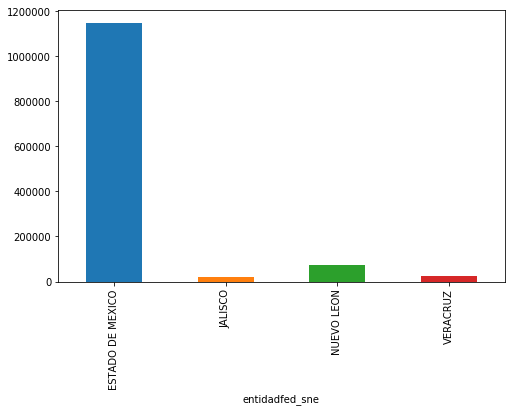

In [70]:
candidatos_clean.groupby('entidadfed_sne')['id'].count().plot.bar(figsize=(8,5));


### ¿Cuál es la escolaridad de candidatos por sexo ?

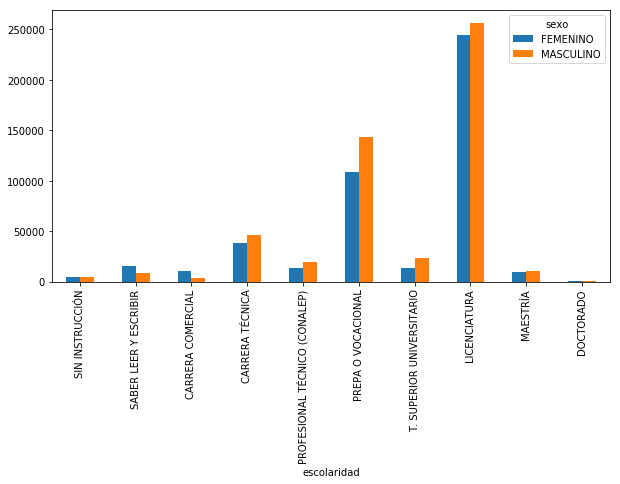

In [66]:
candidatos_clean.groupby(['escolaridad','sexo'])['id'].count().unstack().plot.bar(figsize=(10,5));

### ¿Cuántos candidatos hablan alguna lengua indígena ?

In [123]:
g3 = pd.DataFrame(candidatos_clean.groupby(['lengua_indigena'])['id'].count(), )

In [124]:
g3 = g3.drop(index='No');

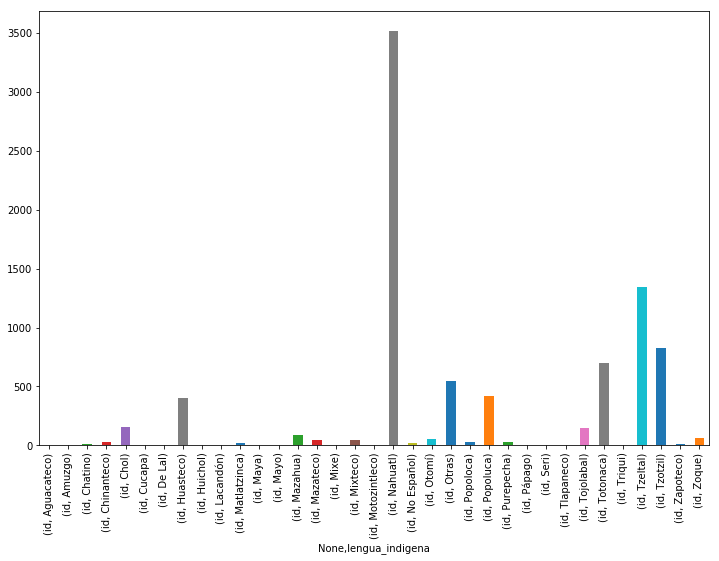

In [125]:
g3.unstack().plot.bar(figsize=(12,8));

### ¿Cómo es la distribución de edades por sexo?

In [129]:
g4 = candidatos_clean[['id','sexo','edad']]

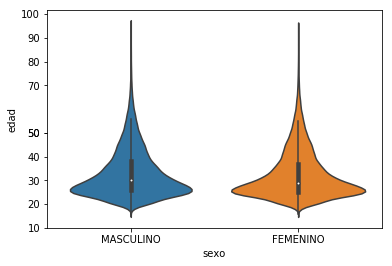

In [136]:
tick_locs = [10,20,30,40,50,50,70,80,90,100]
tick_names = [10,20,30,40,50,50,70,80,90,100]
sns.violinplot(data = g4, x='sexo', y='edad')
plt.yticks(tick_locs,tick_names);

### ¿Cuáles áreas tienen más candidatos registrados?

In [161]:
areas_count = candidatos_clean.groupby('area', as_index=False)['id'].count();

In [168]:
top_10_areas = areas_count.nlargest(10,'id')

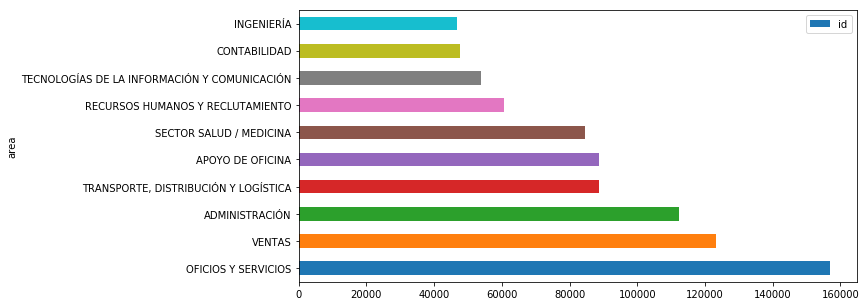

In [169]:
top_10_areas.plot.barh(y='id', x='area', figsize=(10,5)  );

## References
pd.isin()
- https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

Obtener y filtrar datos de un dataframe
- http://pyciencia.blogspot.com/2015/05/obtener-y-filtrar-datos-de-un-dataframe.html
- https://medium.com/@rtjeannier/pandas-101-cont-9d061cb73bfc